# Documentation by example for `shap.plots.heatmap`

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.heatmap` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is a classification task to predict if people made over $50k annually in the 1990s).

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(nestimators=100, max_depth=2).fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X[:1000])

Passing a matrix of SHAP values to the heatmap plot function creates a plot with the instances on the x-axis, the model inputs on the y-axis, and the SHAP values encoded on a color scale. By default the samples are ordered using `shap.order.hclust`, which orders the samples based on a hierarchical clustering by their explanation similarity. This results in samples that have the same model output for the same reason getting grouped together (such as people with a high impact from capital gain in the plot below).

The output of the model is shown above the heatmap matrix (centered around the explaination's `.base_value`), and the global importance of each model input shown as a bar plot on the right hand side of the plot (by default this is the `shap.order.abs.mean` measure of overall importance).

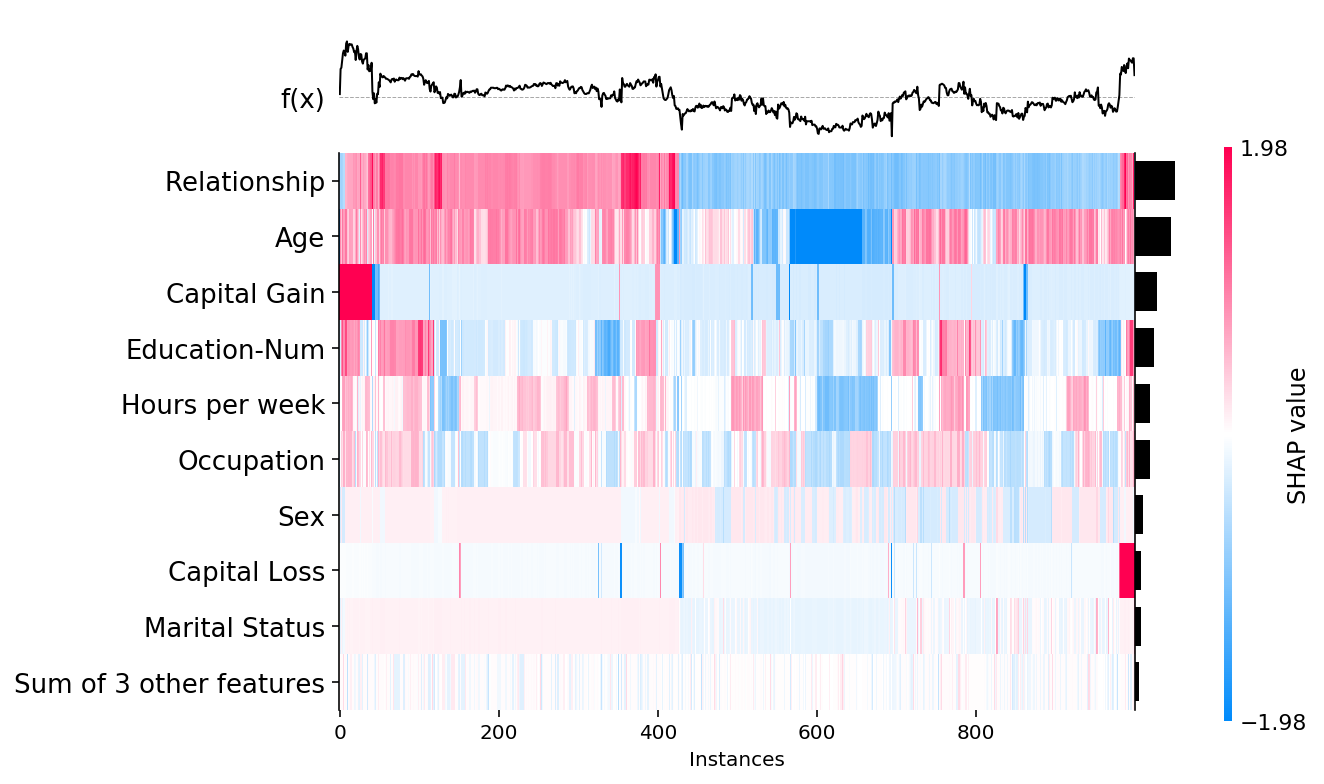

In [2]:
shap.plots.heatmap(shap_values)

Increasing the `max_display` parameter allows for more features to be shown:

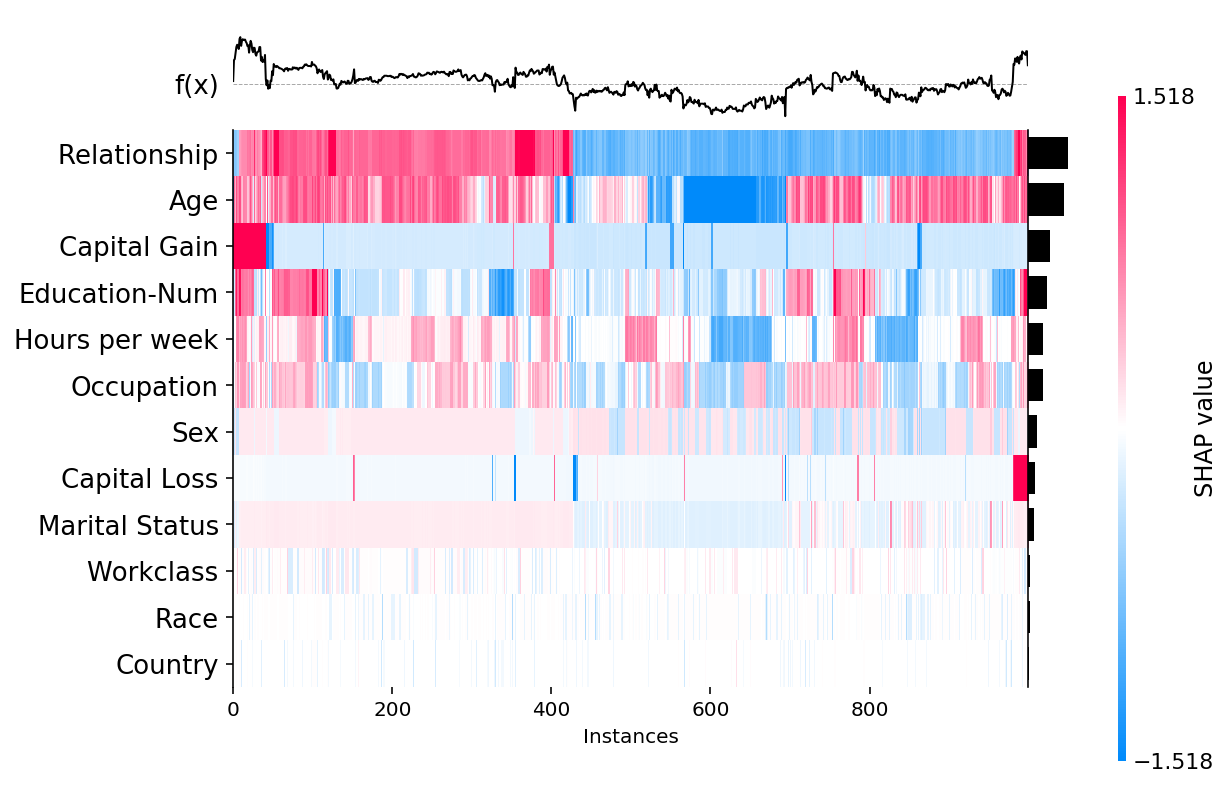

In [3]:
shap.plots.heatmap(shap_values, max_display=12)

## Changing sort order and global feature importance values

We can change the way the overall importance of features are measured (and so also their sort order) by passing a set of values to the `feature_values` parameter. By default `feature_values=shap.Explanation.abs.mean(0)`, but below we show how to instead sort by the maximum absolute value of a feature over all the samples:

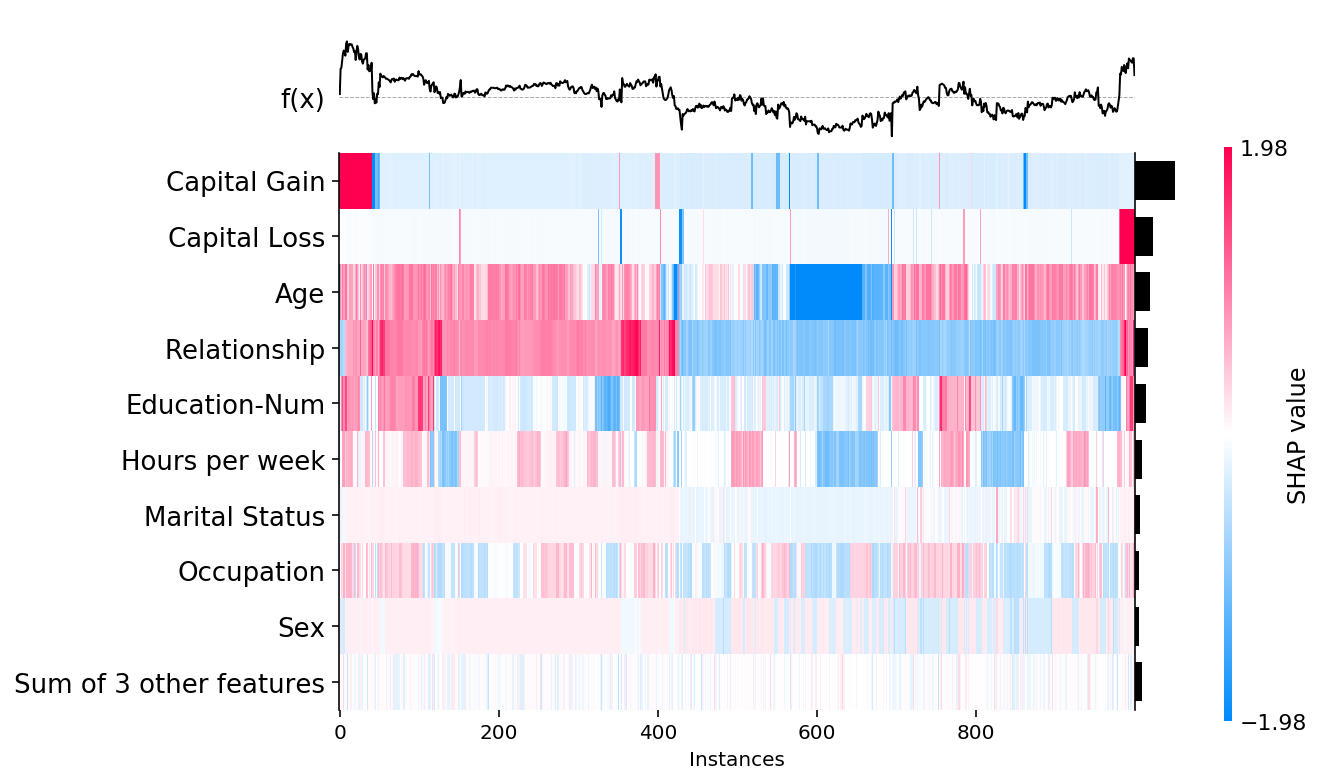

In [4]:
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

We can also control the ordering of the instances using the `instance_order` parameter. By default it is set to `shap.Explanation.hclust(0)` to group samples with similar explantions together. Below we show how sorting by the sum of the SHAP values over all features gives a complementary perspective on the data:

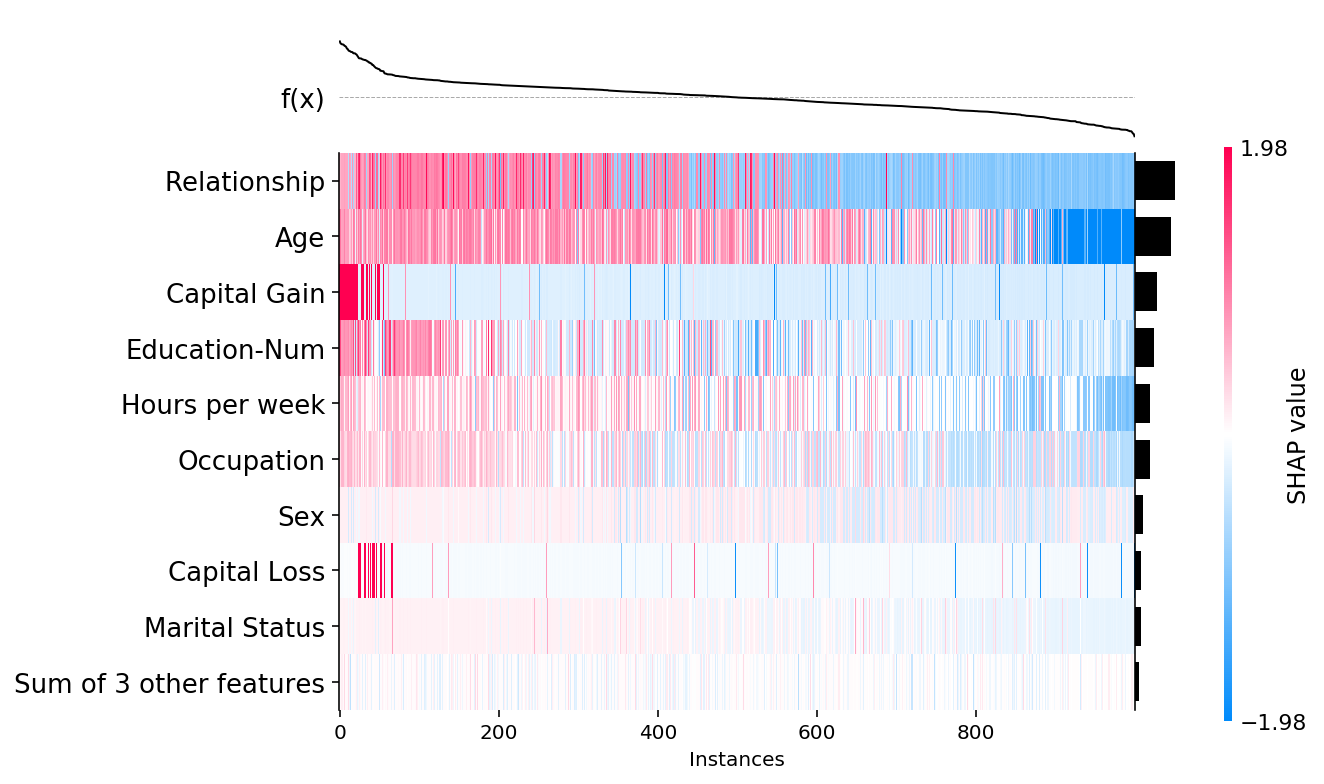

In [5]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 